In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import h5py
import os

os.chdir('/home/salmanfan96/')

In [2]:
nparticles=32
split=(nparticles/2)-1
ndims=2
mass=1

gamma1=1
gamma2=1
rho=1
step_size=1e-3  #dt
ls=0.5
length=np.sqrt(nparticles*3.14*ls**2/rho)
hlength=length/2.0
kBT1=1
kBT2=5

tpoints=int(1e7)


runtime=tpoints*step_size



tref=int(tpoints/1000)
time=np.zeros((tref))
for i in range(tref):
        time[i]=i*step_size*1000



tD1=(ls**2*gamma1)/kBT1
tD2=(ls**2*gamma2)/kBT2

tm1=mass/gamma1
tm2=mass/gamma2

ratio1=tD2**2/(tm1*tD1)
ratio2=tD2/tm2

tD=tD2
randstd1=np.sqrt((2.0*tD1)/(tD*step_size))
randstd2=np.sqrt((2.0*tD2)/(tD*step_size))

D1=kBT1/gamma1

D2=kBT2/gamma2

In [13]:
hf = h5py.File('noneqpbc2.h5', 'r')
pos = hf.get('pos')
vel = hf.get('vel')
potentialf=hf.get('potential')
randomf=hf.get('fr')

pos=np.array(pos)
vel=np.array(vel)
potential=np.array(potentialf)
fr=np.array(randomf)

temp=np.zeros((tref))

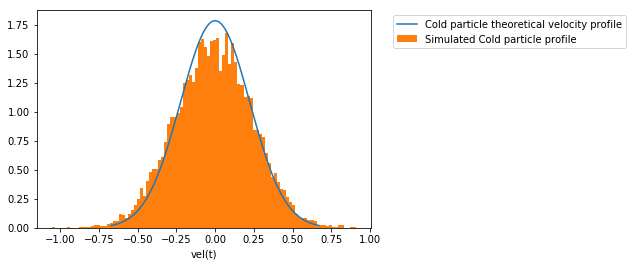

0.1
0.10733632


In [15]:
#plotting the gaussian
mean=0
sd=np.sqrt(ratio2)
#sd=ratio2
pts=np.linspace(mean-3*sd,mean+3*sd,1000)
fig, ax = plt.subplots()
ax.plot(pts,stats.norm.pdf(pts,mean,sd),label="Cold particle theoretical velocity profile")
#h=sorted(vel[0,1:50,0])
#ax.plot(h,stats.norm.pdf(h,np.mean(h),np.std(h)),"b")
ax.hist(vel[25,:,0],bins=100,density=True,label="Simulated Cold particle profile")
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))
ax.set_xlabel('vel(t)')
#plt.savefig('velprof_cold.png', bbox_inches='tight')
plt.show()

print(np.sqrt(ratio1))
print(np.std(vel[2,:,0]))

In [ ]:
def rdf(pos,t,nparticles,ndims,rho,r,dr,part):
   
    npp=0
    width=r+dr
    d=np.zeros((ndims))
    if part==1:
        lower=0
        upper=50
        avg=50
    if part==2:
        lower=50
        upper=nparticles
        avg=50
    if part==3:
        lower=0
        upper=nparticles
        avg=100
    
    pnow=(upper-lower)
    pointden=(pnow*3.14*ls**2)/length**2

    for i in range(lower,upper):
        for j in range(lower,upper):
            if (i!=j):
                for k in range(ndims):
                    d[k]=pos[i,k,t]-pos[j,k,t]
                    if d[k]>hlength:
                        d[k]=d[k]-length
                        
                    if d[k]<=-hlength:
                        d[k]=d[k]+length
                    
                dnorm=np.linalg.norm(d)
                if dnorm>r and dnorm < width:
                    npp=npp+1
    
    
    g=npp/(3.14*((r+dr)**2-r**2)*avg*pointden)
    
    
    return(g)

In [ ]:
#%% RDF Calculation
#t=0
#t=4999
#t=2500
#t=3000
t=spoints-1


rmax=2.0
dr=.2
r=np.linspace(0.0,2.0,1000)
gr1=np.zeros((len(r)))
gr2=np.zeros((len(r)))
gr3=np.zeros((len(r)))
rho=0.8


for k in range(len(r)):
    #gr1[k]=rdf(pos,t,nparticles,ndims,rho,r[k],dr,1)
    #gr2[k]=rdf(pos,t,nparticles,ndims,rho,r[k],dr,2)
    gr3[k]=rdf(pos,t,nparticles,ndims,rho,r[k],dr,3)
    

r=r/0.5
plt.title("RDF: All Particles")
#plt.plot(r,gr1,label="Passive Particles")
#plt.plot(r,gr2,label="Active Particles")
plt.plot(r,gr3,label="Entire System")

plt.savefig('rdf_all.png', bbox_inches='tight')

In [ ]:
#Calculating temperature 
#Function for calculating instantaneous temperature   
temp=np.zeros((spoints))
def tempo(vel,t,nparticles,ndims,mass):
    pe=0.0
    kB=1
    
    for i in range(50):
        #vcity=np.linalg.norm(vel[i,t,:])
        #vcity=vcity*(ls/tD1)
        vcity=(ls/tD)*vel[i,0,t]
        #vcity=vel[i,t,0]
        pe = pe + mass*vcity**2
        
    
    
    #temperature=pe/(kB*ndims*nparticles)
    #temperature=(pe/nparticles)
    temperature=pe/(50)
    
    
    return(temperature)

In [ ]:
for i in range(spoints):
    temp[i]=tempo(vel,i,nparticles,ndims,mass)

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,temp)
ax.set_xlabel('tpoints')
ax.set_ylabel('T1')
plt.title("Teperature (Cold Particles)")
plt.savefig('temp_cold.png', bbox_inches='tight')
plt.show()


np.average(temp[:])